## So the xml files seems to miss the extension .JPG for both <filename> and <path> ... + filename, so the code is corrected as follow

In [2]:
import os
import xml.etree.ElementTree as ET
from xml.dom import minidom

def prettify(elem):
    rough_string = ET.tostring(elem, 'utf-8')
    reparsed = minidom.parseString(rough_string)
    return '\n'.join([line for line in reparsed.toprettyxml(indent="\t").split('\n') if line.strip() and not line.startswith('<?xml')])

def add_extension(directory):
    xml_files = [file for file in os.listdir(directory) if file.endswith('.xml')]
    
    for file in xml_files:
        # Parse the XML file and get the root element
        tree = ET.parse(os.path.join(directory, file))
        root = tree.getroot()

        # Find the filename and path elements and add the extension to their text
        filename = root.find('filename')
        path = root.find('path')

        if filename is not None and path is not None:
            filename.text += '.jpg'
            path.text += '.jpg'

        # Write the modified XML back to the file
        with open(os.path.join(directory, file), 'w', encoding='utf-8') as f:
            f.write(prettify(root))

add_extension('/Users/peter/Desktop/images/')


## Lets show the number of samples based on the 'classes' in the dataset

In order to count the number of different class types in XML files and visualize this data with a bar graph, you can use Python's xml.etree.ElementTree for parsing XML and matplotlib for creating the bar graph.

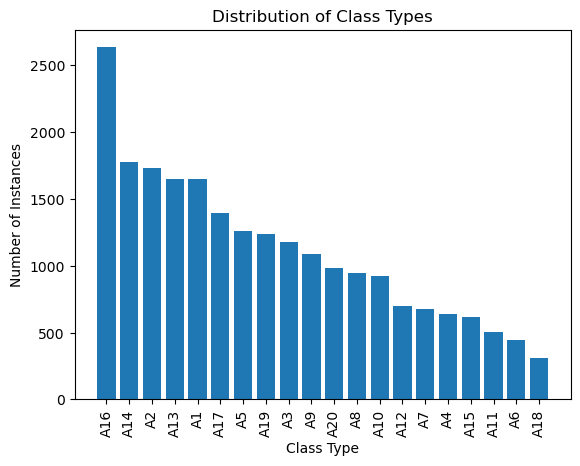

In [3]:
import os
import xml.etree.ElementTree as ET
from collections import Counter
import matplotlib.pyplot as plt

# Specify the directory where the XML files are located
directory = '/Users/peter/Desktop/images'

# Counter to store class frequencies
class_counter = Counter()

# Loop over each XML file in the directory
for filename in os.listdir(directory):
    if filename.endswith('.xml'):
        # Parse the XML file
        tree = ET.parse(os.path.join(directory, filename))
        root = tree.getroot()

        # Find all 'object' tags and for each 'object', find the 'name' tag
        for obj in root.findall('object'):
            class_name = obj.find('name').text
            class_counter[class_name] += 1

# Sort classes from most to least
sorted_classes = sorted(class_counter.items(), key=lambda item: item[1], reverse=True)

# Plot the bar graph
labels, values = zip(*sorted_classes)
plt.bar(labels, values)
plt.xlabel('Class Type')
plt.ylabel('Number of Instances')
plt.title('Distribution of Class Types')
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.show()


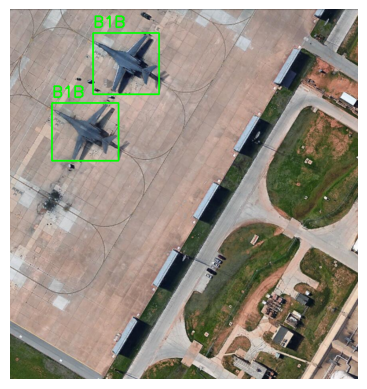

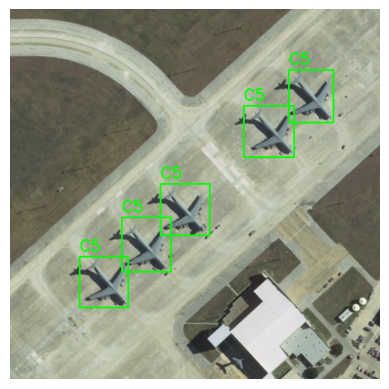

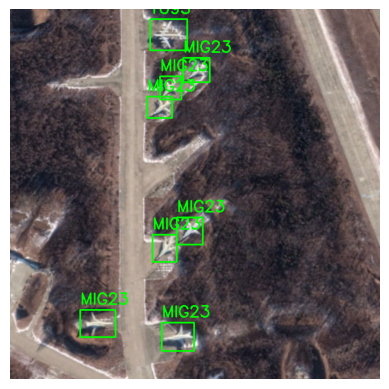

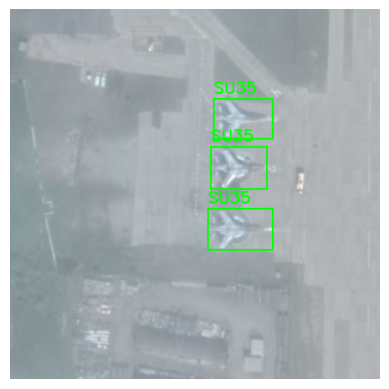

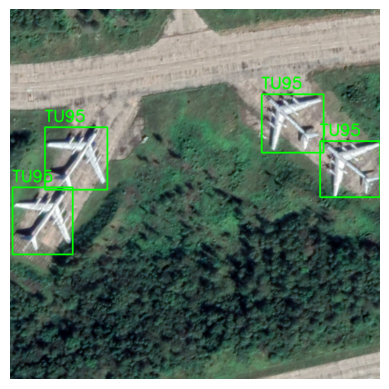

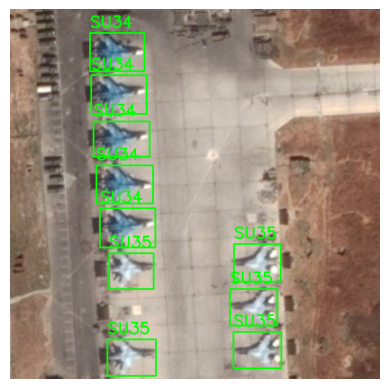

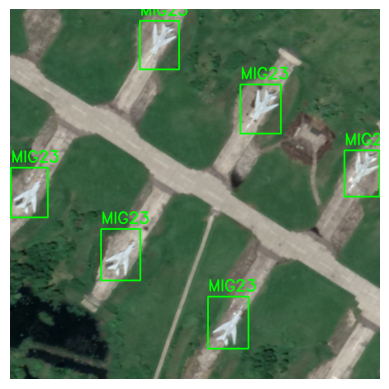

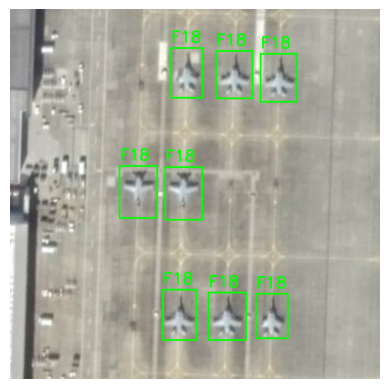

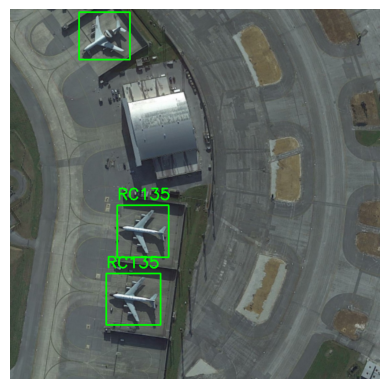

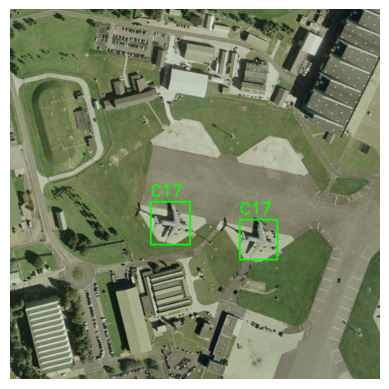

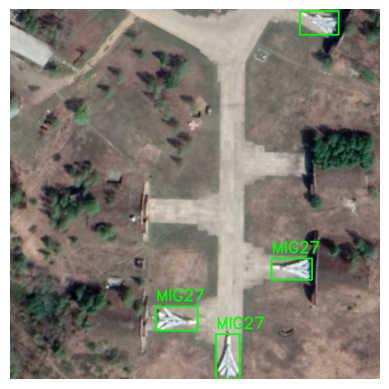

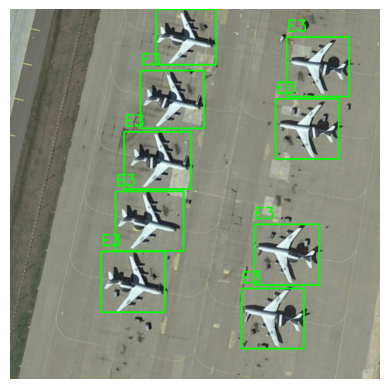

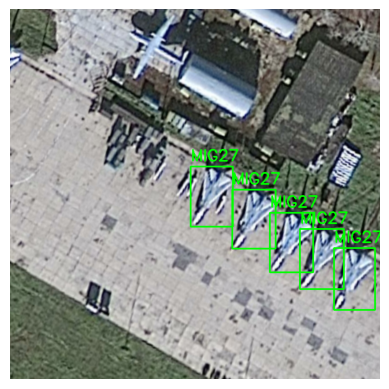

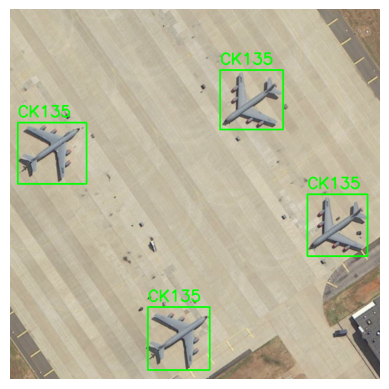

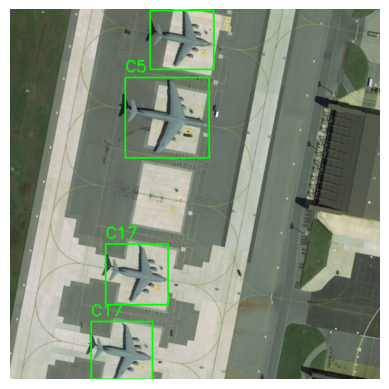

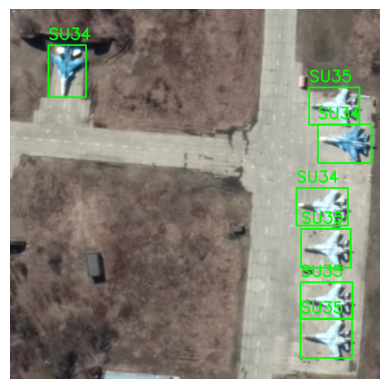

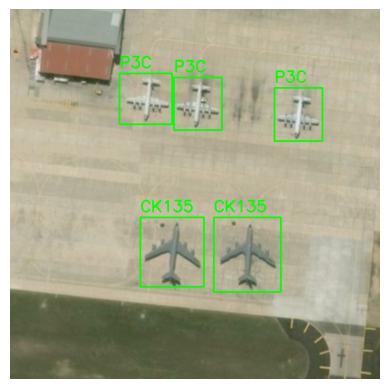

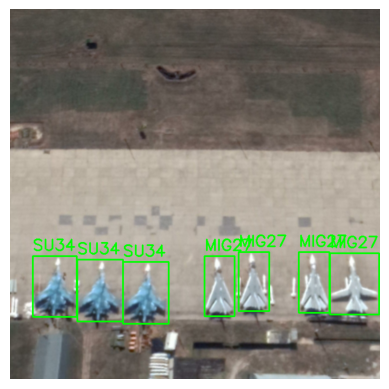

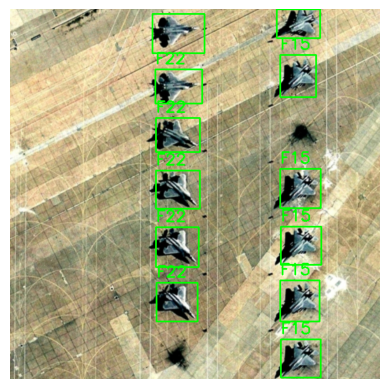

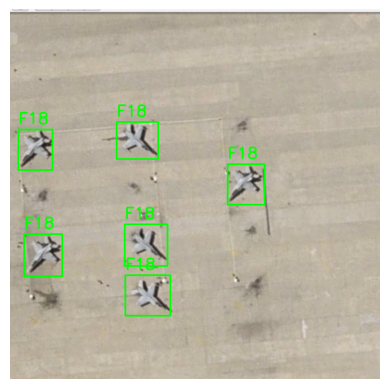

In [73]:
import cv2
import os
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt

# Define the directory
directory = "/Users/peter/Desktop/images/"

# List all files in the directory
files = os.listdir(directory)

# We'll only take the first 5 image files
image_files = [file for file in files if file.endswith('.jpg')][:20]

# Iterate over each image file
for image_file in image_files:
    # Read the image
    img = cv2.imread(os.path.join(directory, image_file))
    h, w = img.shape[:2]

    # Resize the image
    if h > w:
        new_h, new_w = 640, int(640 * w / h)
    else:
        new_w, new_h = 640, int(640 * h / w)
    
    img_resized = cv2.resize(img, (new_w, new_h))

    # Read the xml file
    xml_file = image_file.replace('.jpg', '.xml')
    tree = ET.parse(os.path.join(directory, xml_file))
    root = tree.getroot()

    # Iterate over each object
    for obj in root.iter('object'):
        # Get the bounding box coordinates
        bbox = obj.find('bndbox')
        xmin = int(bbox.find('xmin').text) * new_w // w
        ymin = int(bbox.find('ymin').text) * new_h // h
        xmax = int(bbox.find('xmax').text) * new_w // w
        ymax = int(bbox.find('ymax').text) * new_h // h

        # Get the class name
        class_name = obj.find('name').text

        # Update the bounding box coordinates
        bbox.find('xmin').text = str(xmin)
        bbox.find('ymin').text = str(ymin)
        bbox.find('xmax').text = str(xmax)
        bbox.find('ymax').text = str(ymax)

        # Draw the bounding box on the image
        cv2.rectangle(img_resized, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)
        cv2.putText(img_resized, class_name, (xmin, ymin - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    # Plot the new image with bounding boxes for preview
    plt.figure()
    plt.imshow(cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()


## Labeling system needs to be edited to the correct aircraft name

In [8]:
import os
import xml.etree.ElementTree as ET

# Define the directory path
directory_path = "/Users/peter/Desktop/images/"

# Function to extract unique labels from an XML file
def get_unique_labels_from_xml(xml_file_path):
    unique_labels = set()
    tree = ET.parse(xml_file_path)
    root = tree.getroot()
    for obj in root.findall(".//object"):
        label = obj.find("name").text
        unique_labels.add(label)
    return unique_labels

# List all XML files in the directory
xml_files = [file for file in os.listdir(directory_path) if file.endswith(".xml")]

# Initialize a set to store all unique labels
all_unique_labels = set()

# Loop through each XML file and extract unique labels
for xml_file in xml_files:
    xml_file_path = os.path.join(directory_path, xml_file)
    unique_labels_in_file = get_unique_labels_from_xml(xml_file_path)
    all_unique_labels.update(unique_labels_in_file)

# Convert the set to a sorted list of unique labels
sorted_unique_labels = sorted(list(all_unique_labels))

# Print the list of all unique labels in numeric order by name
print("Unique Labels (Numeric Order by Name):")
for label in sorted_unique_labels:
    print(label)

Unique Labels (Numeric Order by Name):
A1
A10
A11
A12
A13
A14
A15
A16
A17
A18
A19
A2
A20
A3
A4
A5
A6
A7
A8
A9


### The list below is the renamed labels based on the <name> class in .xml files

* A1- SU35
* A10- B1B
* A11- RC135
* A12- MIG23
* A13- F15
* A14- CK135
* A15- F22
* A16- F18
* A17- TU95
* A18- KC46
* A19- SU34
* A2- C130H
* A20- MIG27
* A3- C17
* A4- C5
* A5- F16
* A6- TU160
* A7- E3
* A8- B52
* A9- P3C

#### I am having trouble distinguish the class 'A18'

Lets show all of the images with corresponding .xml files that contains <name>A18</name> for further visual analysis

Let's list out all of the .xml files with A18 in it

In [23]:
import os
import xml.etree.ElementTree as ET

# Define the directory path
directory_path = "/Users/peter/Desktop/images/"

# Function to check if an XML file contains the <name>A18</name> tag
def contains_A18(xml_file_path):
    tree = ET.parse(xml_file_path)
    root = tree.getroot()
    for obj in root.findall(".//object"):
        name = obj.find("name").text
        if name == "A18":
            return True
    return False

# List all XML files in the directory that contain the <name>A18</name> tag
xml_files_with_A18 = [file for file in os.listdir(directory_path) if file.endswith(".xml") and contains_A18(os.path.join(directory_path, file))]

# Print the filenames of .xml format that contain <name>A18</name> tag
print("Filenames of .xml format that contain <name>A18</name> tag:")
for xml_file in xml_files_with_A18:
    print(f"  - {xml_file}")


Filenames of .xml format that contain <name>A18</name> tag:
  - 604.xml
  - 610.xml
  - 1384.xml
  - 572.xml
  - 566.xml
  - 599.xml
  - 598.xml
  - 1422.xml
  - 3553.xml
  - 2659.xml
  - 571.xml
  - 3619.xml
  - 1782.xml
  - 602.xml
  - 1745.xml
  - 2700.xml
  - 561.xml
  - 1630.xml
  - 601.xml
  - 2844.xml
  - 577.xml
  - 588.xml
  - 3179.xml
  - 562.xml
  - 827.xml
  - 614.xml
  - 1495.xml
  - 2188.xml
  - 504.xml
  - 1696.xml
  - 1736.xml
  - 498.xml
  - 2149.xml
  - 503.xml
  - 1281.xml
  - 1530.xml
  - 1733.xml
  - 502.xml
  - 489.xml
  - 1684.xml
  - 500.xml
  - 1043.xml
  - 3132.xml
  - 2013.xml
  - 501.xml
  - 1320.xml
  - 893.xml
  - 487.xml
  - 493.xml
  - 1270.xml
  - 486.xml
  - 1338.xml
  - 2619.xml
  - 2196.xml
  - 692.xml
  - 686.xml
  - 490.xml
  - 484.xml
  - 485.xml
  - 1878.xml
  - 495.xml
  - 1075.xml
  - 2958.xml
  - 3111.xml
  - 286.xml
  - 1114.xml
  - 2409.xml
  - 3259.xml
  - 509.xml
  - 2225.xml
  - 3675.xml
  - 2769.xml
  - 497.xml
  - 95.xml
  - 1399.xml
  

### FOUND IT!! A18 is KC-46 Tanker

## Let's relabel the .xml labeling files with the new `name` class systems

lets re-label the .xml <name> classes with the following new naming system in the directory and write over the old .xml files:

In [26]:
import os
import xml.etree.ElementTree as ET

# Define the directory path
directory_path = "/Users/peter/Desktop/images/"

# Define the mapping from old labels to new labels
label_mapping = {
    "A1": "SU35",
    "A2": "C130H",
    "A3": "C17",
    "A4": "C5",
    "A5": "F16",
    "A6": "TU160",
    "A7": "E3",
    "A8": "B52",
    "A9": "P3C",
    "A10": "B1B",
    "A11": "RC135",
    "A12": "MIG23",
    "A13": "F15",
    "A14": "CK135",
    "A15": "F22",
    "A16": "F18",
    "A17": "TU95",
    "A18": "KC46",
    "A19": "SU34",
    "A20": "MIG27",
}

# Function to relabel the <name> classes in an XML file
def relabel_xml(xml_file_path):
    tree = ET.parse(xml_file_path)
    root = tree.getroot()
    for obj in root.findall(".//object"):
        old_label = obj.find("name").text
        if old_label in label_mapping:
            new_label = label_mapping[old_label]
            obj.find("name").text = new_label
    tree.write(xml_file_path)

# Loop through each XML file and relabel the <name> classes
for xml_file in os.listdir(directory_path):
    if xml_file.endswith(".xml"):
        xml_file_path = os.path.join(directory_path, xml_file)
        relabel_xml(xml_file_path)


### Perfect!! Let's check the new labels on images

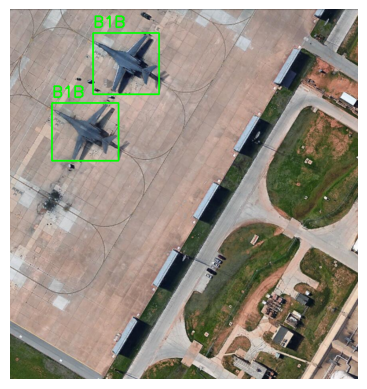

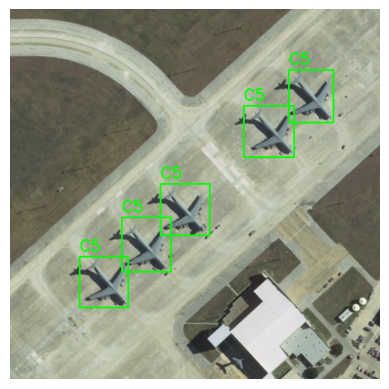

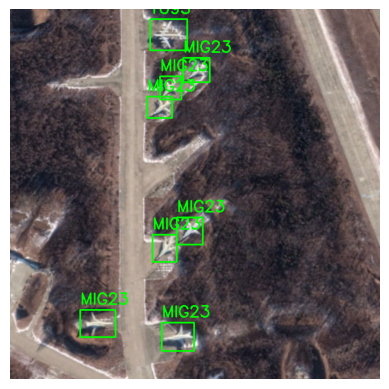

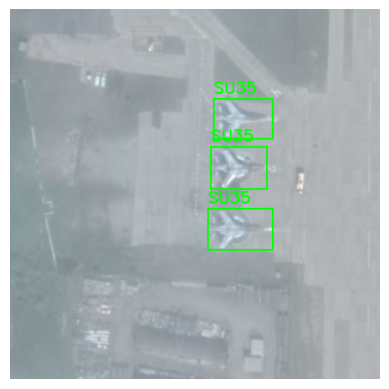

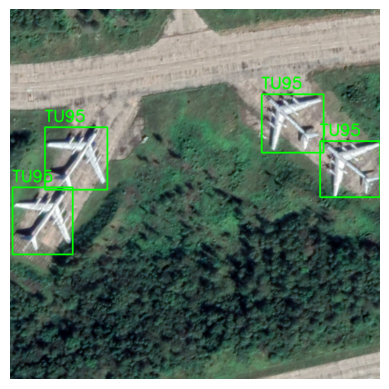

In [72]:
import cv2
import os
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt

# Define the directory
directory = "/Users/peter/Desktop/images/"

# List all files in the directory
files = os.listdir(directory)

# We'll only take the first 5 image files
image_files = [file for file in files if file.endswith('.jpg')][:5]

# Iterate over each image file
for image_file in image_files:
    # Read the image
    img = cv2.imread(os.path.join(directory, image_file))
    h, w = img.shape[:2]

    # Resize the image
    if h > w:
        new_h, new_w = 640, int(640 * w / h)
    else:
        new_w, new_h = 640, int(640 * h / w)
    
    img_resized = cv2.resize(img, (new_w, new_h))

    # Read the xml file
    xml_file = image_file.replace('.jpg', '.xml')
    tree = ET.parse(os.path.join(directory, xml_file))
    root = tree.getroot()

    # Iterate over each object
    for obj in root.iter('object'):
        # Get the bounding box coordinates
        bbox = obj.find('bndbox')
        xmin = int(bbox.find('xmin').text) * new_w // w
        ymin = int(bbox.find('ymin').text) * new_h // h
        xmax = int(bbox.find('xmax').text) * new_w // w
        ymax = int(bbox.find('ymax').text) * new_h // h

        # Get the class name
        class_name = obj.find('name').text

        # Update the bounding box coordinates
        bbox.find('xmin').text = str(xmin)
        bbox.find('ymin').text = str(ymin)
        bbox.find('xmax').text = str(xmax)
        bbox.find('ymax').text = str(ymax)

        # Draw the bounding box on the image
        cv2.rectangle(img_resized, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)
        cv2.putText(img_resized, class_name, (xmin, ymin - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    # Plot the new image with bounding boxes for preview
    plt.figure()
    plt.imshow(cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()


In [39]:
import os
import xml.etree.ElementTree as ET

# Define the directory path
directory_path = "/Users/peter/Desktop/images/"

# Define the correct image folder and path
correct_image_folder = 'images'
correct_image_path = os.path.join(directory_path, correct_image_folder)

# Function to correct the <filename> format, <folder>, and <path> tags in an XML file
def correct_filename_format(xml_file_path):
    tree = ET.parse(xml_file_path)
    root = tree.getroot()

    # Correct <folder> tag
    for elem in root.iter("folder"):
        elem.text = correct_image_folder

    # Correct <filename> and <path> tags
    image_filename = os.path.basename(xml_file_path).replace(".xml", ".jpg")
    for elem in root.iter("filename"):
        filename = elem.text
        if filename.endswith(".xml"):
            new_filename = filename.replace(".xml", ".jpg")
            elem.text = new_filename

    for elem in root.iter("path"):
        current_path = elem.text
        if not current_path.endswith(".jpg"):
            elem.text = os.path.join(correct_image_path, image_filename)

    tree.write(xml_file_path)

# Loop through each XML file and correct the <filename> format, <folder>, and <path> tags
for xml_file in os.listdir(directory_path):
    if xml_file.endswith(".xml"):
        xml_file_path = os.path.join(directory_path, xml_file)
        correct_filename_format(xml_file_path)


In [41]:
import os
import xml.etree.ElementTree as ET

# Define the directory path
directory_path = "/Users/peter/Desktop/images/"

# Function to correct the <path> tag in an XML file
def correct_path_label(xml_file_path):
    tree = ET.parse(xml_file_path)
    root = tree.getroot()

    # Get the corresponding image filename
    image_filename = os.path.basename(xml_file_path).replace(".xml", ".jpg")
    correct_image_path = os.path.join(directory_path, image_filename)

    for elem in root.iter("path"):
        elem.text = correct_image_path

    tree.write(xml_file_path)

# Loop through each XML file and correct the <path> tag
for xml_file in os.listdir(directory_path):
    if xml_file.endswith(".xml"):
        xml_file_path = os.path.join(directory_path, xml_file)
        correct_path_label(xml_file_path)


In [45]:
import os
import xml.etree.ElementTree as ET

# Define the directory path
directory_path = "/Users/peter/Desktop/images/"

# Function to check if <path> and <folder> tags are missing in an XML file
def check_missing_tags(xml_file_path):
    tree = ET.parse(xml_file_path)
    root = tree.getroot()

    # Check if <path> and <folder> tags are present
    folder_present = False
    path_present = False

    for elem in root.iter("folder"):
        folder_present = True
    for elem in root.iter("path"):
        path_present = True

    # Return True if either <folder> or <path> is missing
    return not (folder_present and path_present)

# List to store filenames of .xml files with missing tags
missing_tags_files = []

# Loop through each XML file and check if <folder> and <path> tags are missing
for xml_file in os.listdir(directory_path):
    if xml_file.endswith(".xml"):
        xml_file_path = os.path.join(directory_path, xml_file)
        if check_missing_tags(xml_file_path):
            missing_tags_files.append(xml_file)

# Print the filenames of .xml files with missing tags
print("XML files with missing <folder> or <path> tags:")
for filename in missing_tags_files:
    print(filename)


XML files with missing <folder> or <path> tags:


In [46]:
import os
import xml.etree.ElementTree as ET

# Define the directory path
directory_path = "/Users/peter/Desktop/images/"

# Function to check if tags are in the correct order
def check_tags_order(xml_file_path):
    tree = ET.parse(xml_file_path)
    root = tree.getroot()

    # Define the correct order of tags
    correct_order = [
        "folder",
        "filename",
        "path",
        "source",
        "size",
        "segmented",
        "object",
    ]

    # Extract the tags from the XML file
    tags_order = [elem.tag for elem in root]

    # Check if the tags are in the correct order
    return tags_order == correct_order

# List to store filenames of .xml files with incorrect tag order
incorrect_order_files = []

# Loop through each XML file and check if tags are in the correct order
for xml_file in os.listdir(directory_path):
    if xml_file.endswith(".xml"):
        xml_file_path = os.path.join(directory_path, xml_file)
        if not check_tags_order(xml_file_path):
            incorrect_order_files.append(xml_file)

# Print the filenames of .xml files with incorrect tag order
print("XML files with incorrect tag order:")
for filename in incorrect_order_files:
    print(filename)


XML files with incorrect tag order:
162.xml
604.xml
2699.xml
2841.xml
2855.xml
3593.xml
88.xml
610.xml
176.xml
638.xml
1435.xml
3222.xml
2882.xml
3544.xml
1353.xml
1347.xml
2896.xml
3550.xml
2128.xml
3236.xml
1421.xml
2100.xml
1409.xml
63.xml
823.xml
3578.xml
2666.xml
2672.xml
77.xml
837.xml
189.xml
2114.xml
3785.xml
406.xml
1192.xml
360.xml
1838.xml
374.xml
1186.xml
412.xml
3791.xml
1810.xml
1804.xml
348.xml
1151.xml
2458.xml
3746.xml
3020.xml
1623.xml
3034.xml
3752.xml
1145.xml
2464.xml
3008.xml
2316.xml
1179.xml
2470.xml
3829.xml
572.xml
214.xml
1780.xml
1958.xml
3197.xml
2289.xml
3183.xml
1794.xml
200.xml
566.xml
3815.xml
228.xml
1964.xml
1970.xml
3801.xml
1025.xml
3632.xml
3154.xml
1743.xml
1757.xml
3140.xml
3626.xml
1031.xml
2510.xml
1019.xml
2276.xml
3168.xml
2262.xml
599.xml
2504.xml
3395.xml
1582.xml
770.xml
2935.xml
2921.xml
764.xml
1596.xml
3381.xml
2909.xml
994.xml
758.xml
980.xml
1541.xml
2048.xml
3430.xml
1227.xml
1233.xml
3424.xml
3342.xml
1555.xml
2074.xml
957.xml
2712.

## We need to tailor the labeling files .xml to the format that can be translated into Tensor Record format for further training 

In [55]:
import os

# Define the directory path
directory_path = "/Users/peter/Desktop/images/"

# Function to remove empty lines from a file
def remove_empty_lines(file_path):
    with open(file_path, "r") as file:
        lines = file.readlines()

    # Remove empty lines from the list of lines
    non_empty_lines = [line.strip() for line in lines if line.strip()]

    with open(file_path, "w") as file:
        file.write("\n".join(non_empty_lines))

# Loop through each .xml file and remove empty lines
for xml_file in os.listdir(directory_path):
    if xml_file.endswith(".xml"):
        xml_file_path = os.path.join(directory_path, xml_file)
        remove_empty_lines(xml_file_path)


In [57]:
import os
import xml.etree.ElementTree as ET

# Define the directory path
directory_path = "/Users/peter/Desktop/images/"

# Function to fix indentation in an XML file
def fix_xml_indentation(file_path):
    tree = ET.parse(file_path)
    root = tree.getroot()
    indent(root)
    tree.write(file_path, encoding="unicode")

# Function to recursively fix the indentation of an XML element
def indent(elem, level=0):
    i = "\n" + level * "\t"
    if len(elem):
        if not elem.text or not elem.text.strip():
            elem.text = i + "\t"
        if not elem.tail or not elem.tail.strip():
            elem.tail = i
        for elem in elem:
            indent(elem, level + 1)
        if not elem.tail or not elem.tail.strip():
            elem.tail = i
    else:
        if level and (not elem.tail or not elem.tail.strip()):
            elem.tail = i

# Loop through each .xml file and fix indentation
for xml_file in os.listdir(directory_path):
    if xml_file.endswith(".xml"):
        xml_file_path = os.path.join(directory_path, xml_file)
        fix_xml_indentation(xml_file_path)


In [66]:
import os
import xml.etree.ElementTree as ET

# Path of your xml files
path = '/Users/peter/Desktop/images/'

# Iterate over each file in the directory
for filename in os.listdir(path):
    if filename.endswith('.xml'):  # Only process xml files
        file_path = os.path.join(path, filename)
        # Parse the xml file
        tree = ET.parse(file_path)
        root = tree.getroot()

        # Iterate over each 'object' in the xml
        for obj in root.findall('object'):
            # Find all 'pose', 'truncated', and 'difficult' elements
            pose = obj.findall('pose')
            truncated = obj.findall('truncated')
            difficult = obj.findall('difficult')

            # Remove extra elements
            if len(pose) > 1:
                for p in pose[1:]:
                    obj.remove(p)

            if len(truncated) > 1:
                for t in truncated[1:]:
                    obj.remove(t)

            if len(difficult) > 1:
                for d in difficult[1:]:
                    obj.remove(d)
        
        # Save the changes back to the file
        tree.write(file_path)


In [69]:
import os
import xml.etree.ElementTree as ET
import xml.dom.minidom

# Path of your xml files
path = '/Users/peter/Desktop/images/'

# Iterate over each file in the directory
for filename in os.listdir(path):
    if filename.endswith('.xml'):  # Only process xml files
        file_path = os.path.join(path, filename)
        # Parse the xml file
        tree = ET.parse(file_path)
        root = tree.getroot()

        # Iterate over each 'object' in the xml
        for obj in root.findall('object'):
            # Find all 'pose', 'truncated', and 'difficult' elements
            pose = obj.findall('pose')
            truncated = obj.findall('truncated')
            difficult = obj.findall('difficult')

            # Remove extra elements
            if len(pose) > 1:
                for p in pose[1:]:
                    obj.remove(p)

            if len(truncated) > 1:
                for t in truncated[1:]:
                    obj.remove(t)

            if len(difficult) > 1:
                for d in difficult[1:]:
                    obj.remove(d)

        # Convert the ElementTree to a string
        xml_string = ET.tostring(root, encoding='utf-8')

        # Parse the string to a minidom object
        dom = xml.dom.minidom.parseString(xml_string)

        # Pretty print format the xml
        pretty_xml = dom.toprettyxml()

        # Remove extra empty lines
        pretty_xml = os.linesep.join([s for s in pretty_xml.splitlines() if s.strip()])

        # Save the changes back to the file
        with open(file_path, 'w') as f:
            f.write(pretty_xml)


In [70]:
import os
import xml.etree.ElementTree as ET
import xml.dom.minidom

# Path of your xml files
path = '/Users/peter/Desktop/images/'

# Iterate over each file in the directory
for filename in os.listdir(path):
    if filename.endswith('.xml'):  # Only process xml files
        file_path = os.path.join(path, filename)
        # Parse the xml file
        tree = ET.parse(file_path)
        root = tree.getroot()

        # Iterate over each 'object' in the xml
        for obj in root.findall('object'):
            # Find all 'pose', 'truncated', and 'difficult' elements
            pose = obj.findall('pose')
            truncated = obj.findall('truncated')
            difficult = obj.findall('difficult')

            # Remove extra elements
            if len(pose) > 1:
                for p in pose[1:]:
                    obj.remove(p)

            if len(truncated) > 1:
                for t in truncated[1:]:
                    obj.remove(t)

            if len(difficult) > 1:
                for d in difficult[1:]:
                    obj.remove(d)

        # Convert the ElementTree to a string
        xml_string = ET.tostring(root, encoding='utf-8')

        # Parse the string to a minidom object
        dom = xml.dom.minidom.parseString(xml_string)

        # Pretty print format the xml
        pretty_xml = dom.toprettyxml()

        # Remove extra empty lines
        pretty_xml = os.linesep.join([s for s in pretty_xml.splitlines() if s.strip()])

        # Remove XML declaration
        pretty_xml = pretty_xml.replace('<?xml version="1.0" ?>', '', 1)

        # Save the changes back to the file
        with open(file_path, 'w') as f:
            f.write(pretty_xml)


In [71]:
import os

# Path of your xml files
path = '/Users/peter/Desktop/images/'

# Iterate over each file in the directory
for filename in os.listdir(path):
    if filename.endswith('.xml'):  # Only process xml files
        file_path = os.path.join(path, filename)
        
        with open(file_path, 'r') as file:
            lines = file.readlines()

        # Remove the first line
        lines.pop(0)
        
        # Write the remaining lines back to the file
        with open(file_path, 'w') as file:
            file.writelines(lines)
